In [45]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('churn data.csv')
dataset.head()
# Get summary of dataset
print(dataset.info())
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [47]:
# Check for missing values
print(dataset.isnull().sum())


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [48]:
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#  Check for missing values (optional since you said there are none)
print(dataset.isnull().sum())

#  Convert 'Yes'/'No' columns to numeric using LabelEncoder
le = LabelEncoder()
dataset['Churn'] = le.fit_transform(dataset['Churn'])              # Yes=1, No=0
dataset['International plan'] = le.fit_transform(dataset['International plan'])
dataset['Voice mail plan'] = le.fit_transform(dataset['Voice mail plan'])




Account length           0
Area code                0
International plan       0
Voice mail plan          0
Number vmail messages    0
                        ..
State_VT                 0
State_WA                 0
State_WI                 0
State_WV                 0
State_WY                 0
Length: 69, dtype: int64


In [53]:
# Converting state column in to 0 and 1
dataset = dataset.astype(int)


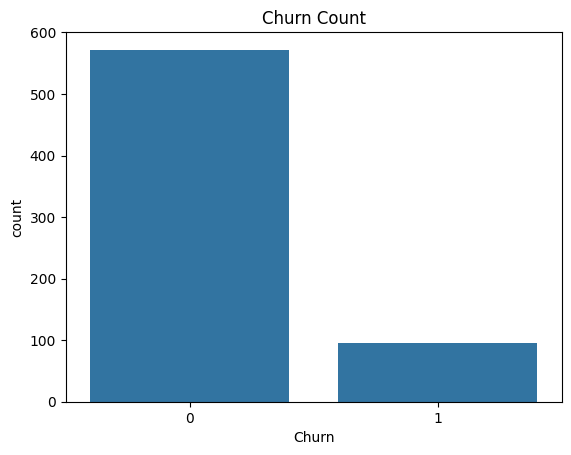

In [56]:
# Churn distribution
sns.countplot(x='Churn', data=dataset)
plt.title("Churn Count")
plt.show()

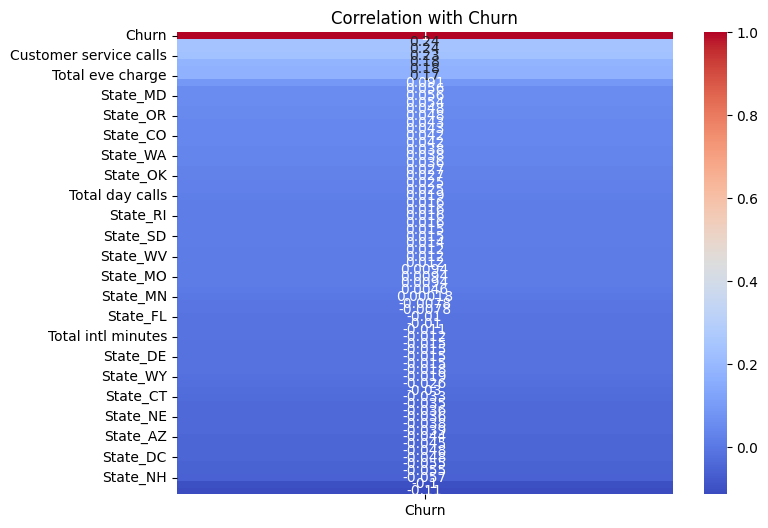

In [61]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Churn")
plt.show()


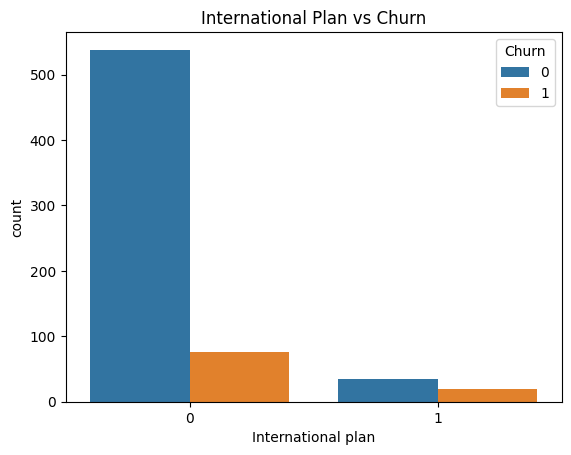

In [62]:
# International plan vs Churn
sns.countplot(x='International plan', hue='Churn', data=dataset)
plt.title("International Plan vs Churn")
plt.show()

In [64]:
# Features (X) → all columns except 'Churn'
X = dataset.drop('Churn', axis=1)
# Target (y) → 'Churn' column
y = dataset['Churn']



In [65]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=5000)  

# Train the model on training data
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [68]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [69]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9104477611940298


In [70]:
# Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       119
           1       0.67      0.40      0.50        15

    accuracy                           0.91       134
   macro avg       0.80      0.69      0.73       134
weighted avg       0.90      0.91      0.90       134



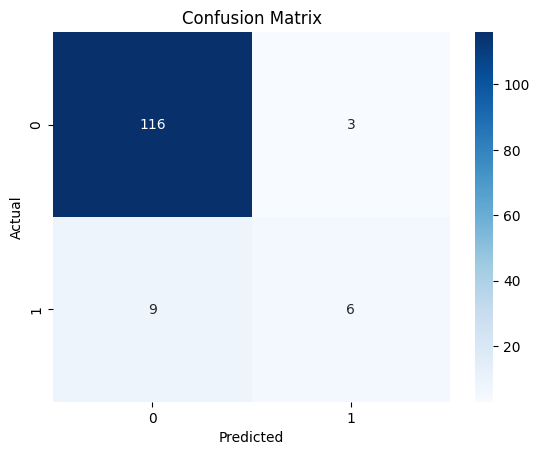

In [71]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()